In [387]:
import numpy as np 
import pandas as pd
import missingno as mngo
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.style as style
import matplotlib.gridspec as gridspec

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

<h2> Loading Data and selecting only diesel vehicles </h2>

In [306]:
df = pd.read_csv("vehicles.csv")
df = df.loc[df['fuel'] == 'diesel']

<h2>First Data Exploration</h2>

In [307]:
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
8,7120857037,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,https://oregoncoast.craigslist.org,0,2012.0,ram,3500,NaN,6 cylinders,...,4wd,NaN,truck,NaN,https://images.craigslist.org/00D0D_gtnHVPZnov...,"Sunrise Auto SalesTry our Delivery Service , N...",NaN,or,45.4072,-122.6250
13,7120426801,https://maine.craigslist.org/ctd/d/harpswell-m...,maine,https://maine.craigslist.org,0,2016.0,chevrolet,high country,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00f0f_3h0bIrEe74...,If you're needing a reliable vehicle and your ...,NaN,me,43.7811,-69.9955
21,7120811070,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,https://oregoncoast.craigslist.org,0,2017.0,gmc,sierra 3500,NaN,8 cylinders,...,4wd,NaN,truck,NaN,https://images.craigslist.org/01414_8PCs5EMUX5...,"Sunrise Auto SalesTry our Delivery Service , N...",NaN,or,45.4072,-122.6250
37,7120751744,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,https://oregoncoast.craigslist.org,0,2004.0,chevrolet,silverado 2500,NaN,8 cylinders,...,4wd,NaN,truck,NaN,https://images.craigslist.org/00505_mVyueehWqo...,"Sunrise Auto SalesTry our Delivery Service , N...",NaN,or,45.4072,-122.6250
45,7120699353,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,https://oregoncoast.craigslist.org,0,2015.0,ford,f-350 super duty xlt,NaN,8 cylinders,...,4wd,NaN,truck,NaN,https://images.craigslist.org/00s0s_aoYoY2Uryn...,"Sunrise Auto SalesTry our Delivery Service , N...",NaN,or,45.4072,-122.6250
67,7115044018,https://greenville.craigslist.org/cto/d/union-...,greenville / upstate,https://greenville.craigslist.org,18500,2000.0,ford,f-550,good,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00G0G_jKfjQuu6rn...,"2000 Ford F-550 Engine 7.3 Diesel, 6 speed ma...",NaN,sc,34.7269,-81.6202
75,7119856986,https://miami.craigslist.org/mdc/ctd/d/lebanon...,south florida,https://miami.craigslist.org,19900,2012.0,NaN,Hino 338,good,NaN,...,rwd,full-size,truck,white,https://images.craigslist.org/00M0M_eXyxZwKDd0...,2013 Hino 338 7.6L J08E Turbo Diesel (260 HP) ...,NaN,fl,40.3812,-76.4368
90,7120385745,https://maine.craigslist.org/cto/d/saint-basil...,maine,https://maine.craigslist.org,4500,2003.0,chevrolet,silverado 2500hd,fair,NaN,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00C0C_klnjdTi6g2...,2003 Chevy Duramax 2500 189000 miles Injector...,NaN,me,47.3343,-68.2314
95,7120535502,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,https://oregoncoast.craigslist.org,9500,2003.0,NaN,Workhorse P42,excellent,NaN,...,NaN,NaN,van,white,https://images.craigslist.org/00g0g_iQEVNc0xJ9...,2003 Workhorse P42 step van 123k miles Diesel ...,NaN,or,45.5721,-122.5490
99,7119852759,https://miami.craigslist.org/pbc/ctd/d/okeecho...,south florida,https://miami.craigslist.org,45500,2016.0,ford,super duty f-250 king ranch,like new,8 cylinders,...,4wd,full-size,pickup,red,https://images.craigslist.org/00j0j_7mCaj1wsSc...,**1-Owner**SUPERLIFT Suspension Lift Kit**Cust...,NaN,fl,27.2341,-80.8299


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37814 entries, 8 to 435843
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            37814 non-null  int64  
 1   url           37814 non-null  object 
 2   region        37814 non-null  object 
 3   region_url    37814 non-null  object 
 4   price         37814 non-null  int64  
 5   year          37667 non-null  float64
 6   manufacturer  32481 non-null  object 
 7   model         36618 non-null  object 
 8   condition     17809 non-null  object 
 9   cylinders     21511 non-null  object 
 10  fuel          37814 non-null  object 
 11  odometer      30433 non-null  float64
 12  title_status  37655 non-null  object 
 13  transmission  37518 non-null  object 
 14  vin           20560 non-null  object 
 15  drive         27458 non-null  object 
 16  size          11242 non-null  object 
 17  type          26032 non-null  object 
 18  paint_color   24927 non-n

In [309]:
profile = ProfileReport(df, minimal=True)

In [310]:
profile

<h2> Data Cleaning </h2>

<h3> Dropping columns that wont be useful </h3>

In [311]:
delete_columns = ['url', 'region', 'region_url', 'title_status', 'vin', 'size', 'image_url', 'description','county','state', 'lat','long','fuel']
df = df.drop(columns = delete_columns)

<h3> Missing data </h3>

In [312]:
df.isnull().sum()

id                  0
price               0
year              147
manufacturer     5333
model            1196
condition       20005
cylinders       16303
odometer         7381
transmission      296
drive           10356
type            11782
paint_color     12887
dtype: int64

In [313]:
df.notnull().sum()

id              37814
price           37814
year            37667
manufacturer    32481
model           36618
condition       17809
cylinders       21511
odometer        30433
transmission    37518
drive           27458
type            26032
paint_color     24927
dtype: int64

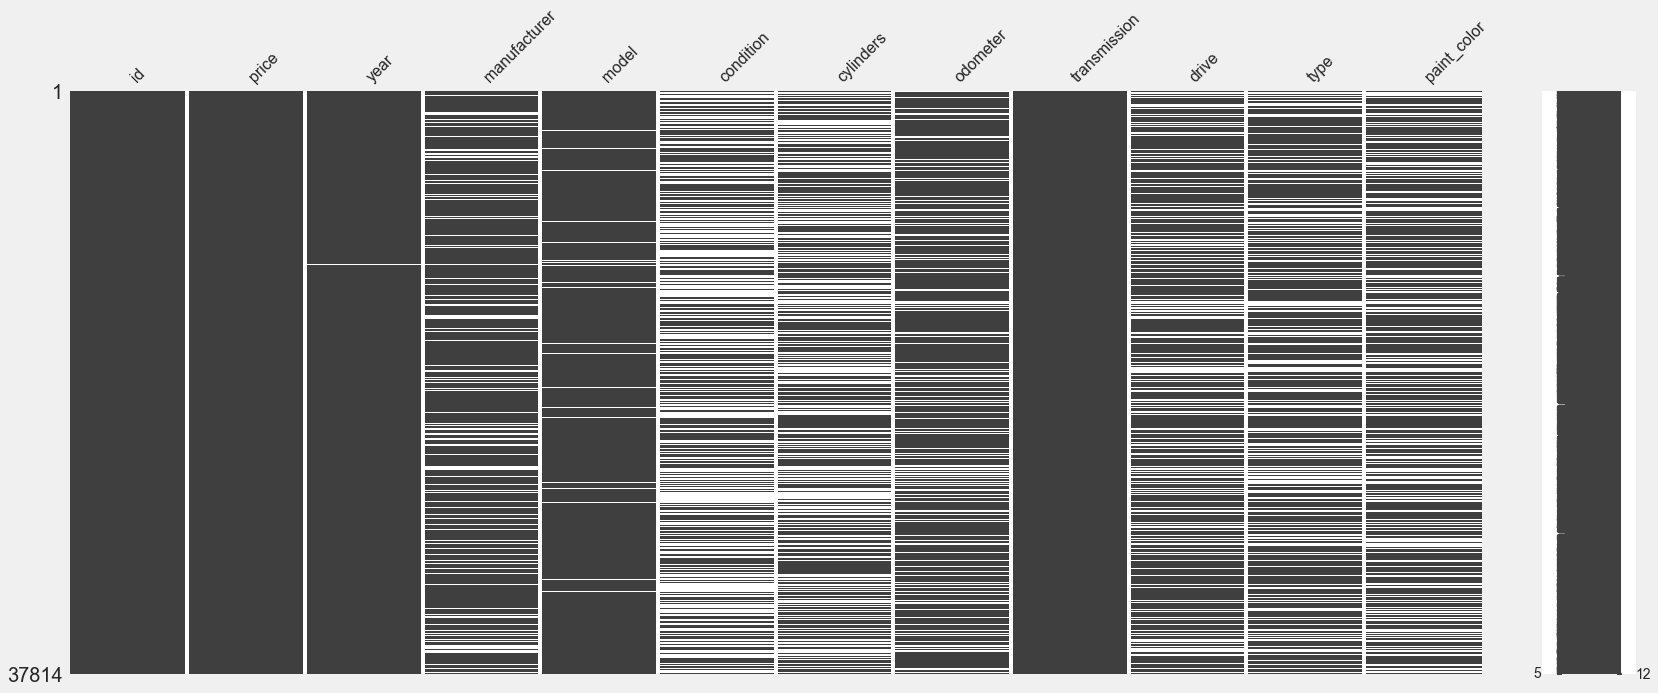

In [314]:
mngo.matrix(df)

<h4> Imputing missing data </h4>

For categorical data types and year variable we will use mode imputation and for numerical values we will use mean imputation

In [315]:
for col in df.columns:
    if df[col].dtype=='float':
        df[col]=df[col].fillna(df[col].mean())
    if df[col].dtype=='object':
        df[col]=df[col].fillna(df[col].mode()[0])
    df['year']=df['year'].fillna(df['year'].mode()[0])

In [316]:
df.isnull().sum()

id              0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

In [317]:
df.head(10)

,id,price,year,manufacturer,model,condition,cylinders,odometer,transmission,drive,type,paint_color
8,7120857037,0,2012.0,ram,3500,excellent,6 cylinders,116515.000000,automatic,4wd,truck,white
13,7120426801,0,2016.0,chevrolet,high country,excellent,8 cylinders,135015.268557,automatic,4wd,truck,white
21,7120811070,0,2017.0,gmc,sierra 3500,excellent,8 cylinders,53193.000000,automatic,4wd,truck,white
37,7120751744,0,2004.0,chevrolet,silverado 2500,excellent,8 cylinders,209752.000000,automatic,4wd,truck,white
45,7120699353,0,2015.0,ford,f-350 super duty xlt,excellent,8 cylinders,73168.000000,automatic,4wd,truck,white
67,7115044018,18500,2000.0,ford,f-550,good,8 cylinders,252000.000000,manual,4wd,truck,white
75,7119856986,19900,2012.0,ford,Hino 338,good,8 cylinders,189974.000000,automatic,rwd,truck,white
90,7120385745,4500,2003.0,chevrolet,silverado 2500hd,fair,8 cylinders,189000.000000,automatic,4wd,pickup,blue
95,7120535502,9500,2003.0,ford,Workhorse P42,excellent,8 cylinders,123000.000000,automatic,4wd,van,white
99,7119852759,45500,2016.0,ford,super duty f-250 king ranch,like new,8 cylinders,51806.000000,automatic,4wd,pickup,red


<h3> Removing all duplicates </h3>

In [318]:
df.duplicated()

8         False
13        False
21        False
37        False
45        False
          ...  
435777    False
435787    False
435802    False
435825    False
435843    False
Length: 37814, dtype: bool

In [319]:
df = df.drop_duplicates(['id'])

<h5>And now dropping the id column </h5>

In [320]:
df = df.drop(columns = ['id'])

In [321]:
df

,price,year,manufacturer,model,condition,cylinders,odometer,transmission,drive,type,paint_color
8,0,2012.0,ram,3500,excellent,6 cylinders,116515.000000,automatic,4wd,truck,white
13,0,2016.0,chevrolet,high country,excellent,8 cylinders,135015.268557,automatic,4wd,truck,white
21,0,2017.0,gmc,sierra 3500,excellent,8 cylinders,53193.000000,automatic,4wd,truck,white
37,0,2004.0,chevrolet,silverado 2500,excellent,8 cylinders,209752.000000,automatic,4wd,truck,white
45,0,2015.0,ford,f-350 super duty xlt,excellent,8 cylinders,73168.000000,automatic,4wd,truck,white
...,...,...,...,...,...,...,...,...,...,...,...
435777,0,2002.0,ford,f-450 7.3 reg cab with a 11' dump,excellent,8 cylinders,107073.000000,automatic,rwd,truck,white
435787,19900,2012.0,chevrolet,2500hd 4x4 ext-cab short box pickup,excellent,8 cylinders,131994.000000,automatic,4wd,truck,silver
435802,0,2014.0,ram,"3500 slt, diesel, 4x4, low",excellent,6 cylinders,98051.000000,automatic,4wd,truck,white
435825,29500,2015.0,ram,diesel cummins 3500,excellent,6 cylinders,90238.000000,automatic,4wd,truck,grey


<h3> Removing Outliers </h3>

In [322]:
df['price'].value_counts()

0        3343
19995     351
15000     282
12500     260
18995     246
         ... 
54990       1
30599       1
7799        1
54862       1
35750       1
Name: price, Length: 3044, dtype: int64

In [323]:
df.describe(percentiles=[.01,.02,.05, .1, .5, .9, .95, .96, .97, .98, .99])

,price,year,odometer
count,3.781400e+04,37814.000000,3.781400e+04
mean,8.967181e+04,2009.696541,1.350153e+05
std,1.298565e+07,6.756234,1.253525e+05
min,0.000000e+00,1934.000000,0.000000e+00
1%,0.000000e+00,1987.000000,0.000000e+00
2%,0.000000e+00,1993.000000,2.700000e+01
5%,0.000000e+00,1999.000000,1.300000e+04
10%,9.550000e+02,2001.000000,3.300000e+04
50%,1.990000e+04,2011.000000,1.350153e+05
90%,4.299710e+04,2017.000000,2.230000e+05


<h5> Lets remove all cars with price smaller than 1000 and bigger than 60000 </h5>

In [324]:
df = df[df['price'] > 1000]
df = df[df['price'] < 60000]

In [325]:
df

,price,year,manufacturer,model,condition,cylinders,odometer,transmission,drive,type,paint_color
67,18500,2000.0,ford,f-550,good,8 cylinders,252000.0,manual,4wd,truck,white
75,19900,2012.0,ford,Hino 338,good,8 cylinders,189974.0,automatic,rwd,truck,white
90,4500,2003.0,chevrolet,silverado 2500hd,fair,8 cylinders,189000.0,automatic,4wd,pickup,blue
95,9500,2003.0,ford,Workhorse P42,excellent,8 cylinders,123000.0,automatic,4wd,van,white
99,45500,2016.0,ford,super duty f-250 king ranch,like new,8 cylinders,51806.0,automatic,4wd,pickup,red
...,...,...,...,...,...,...,...,...,...,...,...
435750,6900,2003.0,ford,f550 super duty,excellent,8 cylinders,79000.0,automatic,4wd,truck,white
435763,27950,2012.0,ford,f550 dump trcuk,excellent,8 cylinders,115000.0,automatic,4wd,truck,white
435787,19900,2012.0,chevrolet,2500hd 4x4 ext-cab short box pickup,excellent,8 cylinders,131994.0,automatic,4wd,truck,silver
435825,29500,2015.0,ram,diesel cummins 3500,excellent,6 cylinders,90238.0,automatic,4wd,truck,grey


<h5>Lets remove cars older than 1980 and that produce next year :) </h5>

In [326]:
df = df[df['year'] >= 1980]
df = df[df['year'] <= 2020]

In [327]:
df

,price,year,manufacturer,model,condition,cylinders,odometer,transmission,drive,type,paint_color
67,18500,2000.0,ford,f-550,good,8 cylinders,252000.0,manual,4wd,truck,white
75,19900,2012.0,ford,Hino 338,good,8 cylinders,189974.0,automatic,rwd,truck,white
90,4500,2003.0,chevrolet,silverado 2500hd,fair,8 cylinders,189000.0,automatic,4wd,pickup,blue
95,9500,2003.0,ford,Workhorse P42,excellent,8 cylinders,123000.0,automatic,4wd,van,white
99,45500,2016.0,ford,super duty f-250 king ranch,like new,8 cylinders,51806.0,automatic,4wd,pickup,red
...,...,...,...,...,...,...,...,...,...,...,...
435750,6900,2003.0,ford,f550 super duty,excellent,8 cylinders,79000.0,automatic,4wd,truck,white
435763,27950,2012.0,ford,f550 dump trcuk,excellent,8 cylinders,115000.0,automatic,4wd,truck,white
435787,19900,2012.0,chevrolet,2500hd 4x4 ext-cab short box pickup,excellent,8 cylinders,131994.0,automatic,4wd,truck,silver
435825,29500,2015.0,ram,diesel cummins 3500,excellent,6 cylinders,90238.0,automatic,4wd,truck,grey


<h5>Lets also remove cars with odometer bigger than 450000</h5>

In [328]:
df = df[df['odometer'] <= 450000]

In [329]:
df

,price,year,manufacturer,model,condition,cylinders,odometer,transmission,drive,type,paint_color
67,18500,2000.0,ford,f-550,good,8 cylinders,252000.0,manual,4wd,truck,white
75,19900,2012.0,ford,Hino 338,good,8 cylinders,189974.0,automatic,rwd,truck,white
90,4500,2003.0,chevrolet,silverado 2500hd,fair,8 cylinders,189000.0,automatic,4wd,pickup,blue
95,9500,2003.0,ford,Workhorse P42,excellent,8 cylinders,123000.0,automatic,4wd,van,white
99,45500,2016.0,ford,super duty f-250 king ranch,like new,8 cylinders,51806.0,automatic,4wd,pickup,red
...,...,...,...,...,...,...,...,...,...,...,...
435750,6900,2003.0,ford,f550 super duty,excellent,8 cylinders,79000.0,automatic,4wd,truck,white
435763,27950,2012.0,ford,f550 dump trcuk,excellent,8 cylinders,115000.0,automatic,4wd,truck,white
435787,19900,2012.0,chevrolet,2500hd 4x4 ext-cab short box pickup,excellent,8 cylinders,131994.0,automatic,4wd,truck,silver
435825,29500,2015.0,ram,diesel cummins 3500,excellent,6 cylinders,90238.0,automatic,4wd,truck,grey


<h3> Data Visualization </h3>

<h4>Price </h4>

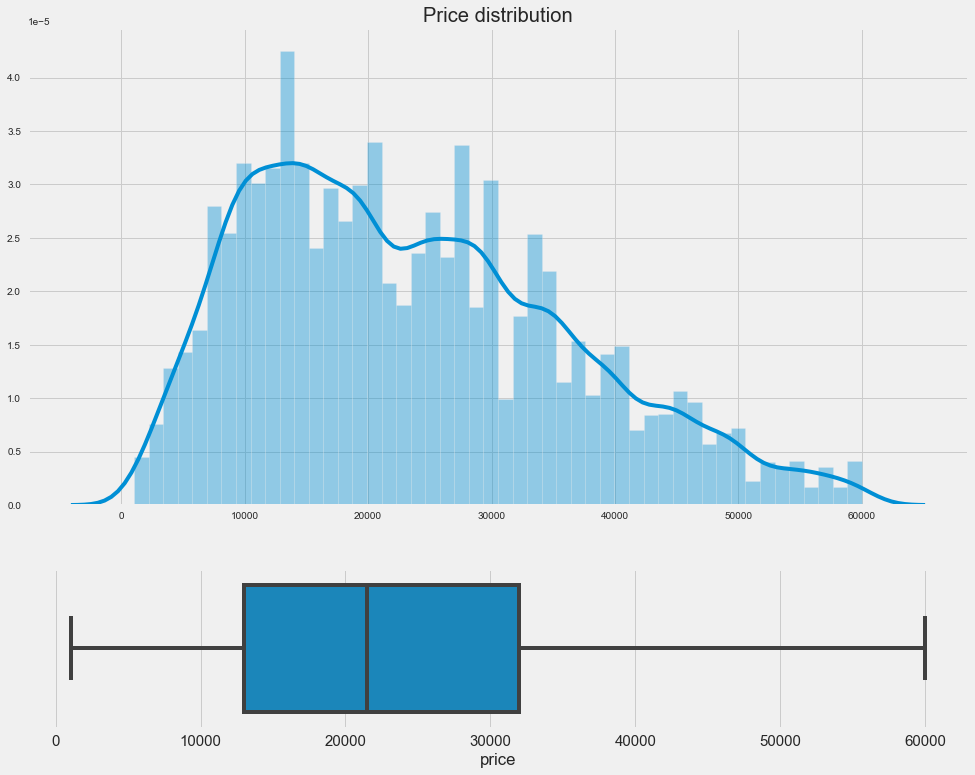

In [330]:
x = df.price

f, (ax_hist, ax_box) = plt.subplots(2, gridspec_kw={"height_ratios": (.75, .25)},figsize=(15,12))
ax_box.tick_params(labelsize=15)

sns.distplot(x,bins=50,ax=ax_hist)
sns.boxplot(x,ax= ax_box,fliersize = 0);
ax_hist.set(title="Price distribution",xlabel = '',);

<h4>Year of production </h4>

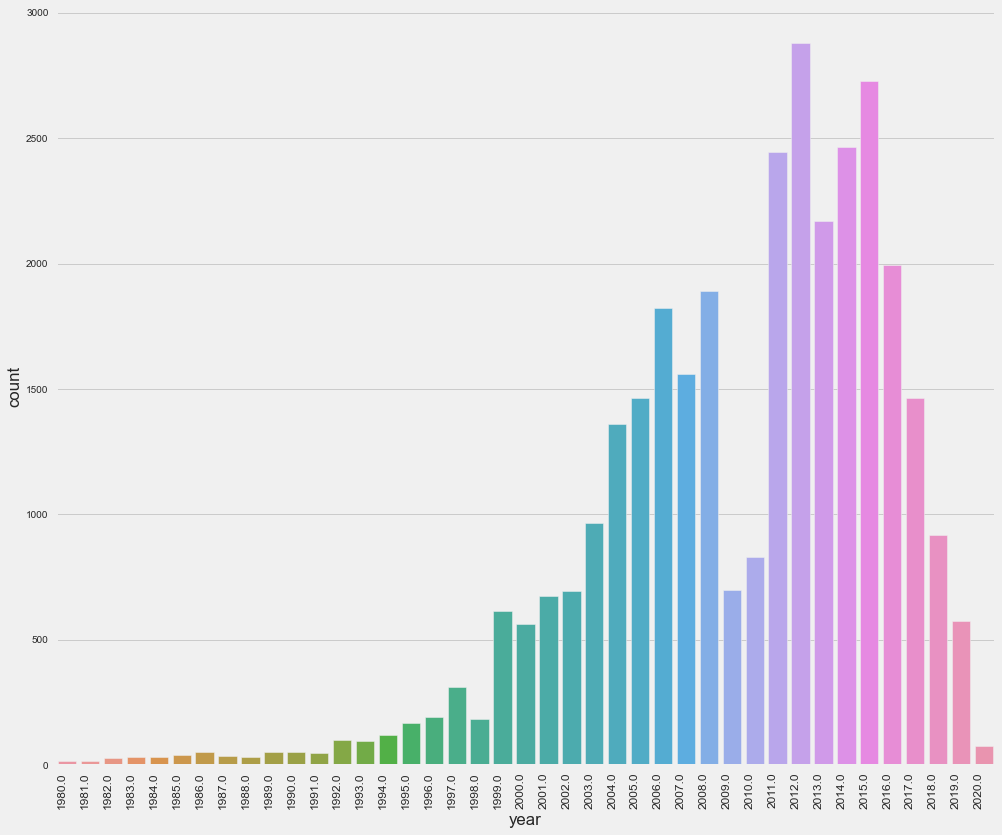

In [331]:
plt.figure(figsize=(15,13))
ax = sns.countplot(x='year',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12);

<h4> Manufacturers </h4>

Text(0.5, 1.0, 'Manufacturers vs no. of listings')

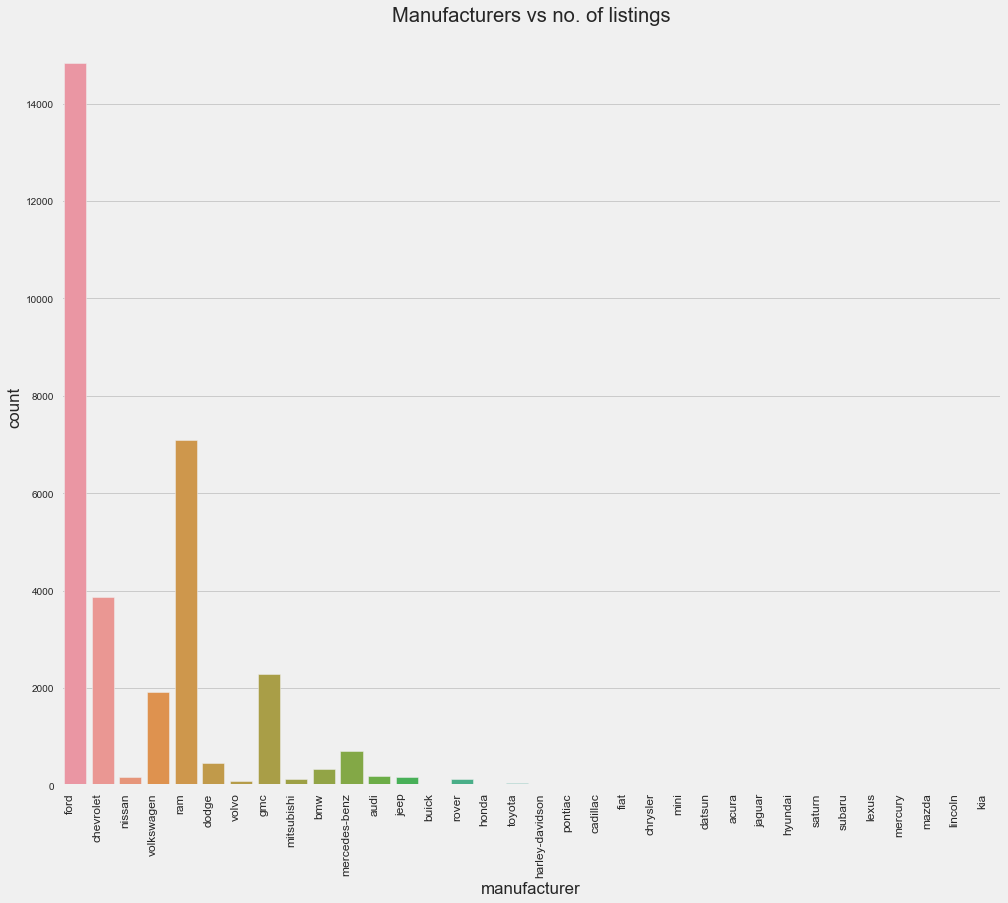

In [332]:
plt.figure(figsize=(15,13))
ax = sns.countplot(x='manufacturer',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12);
plt.title("Manufacturers vs no. of listings")

<h3> Odometer </h3>

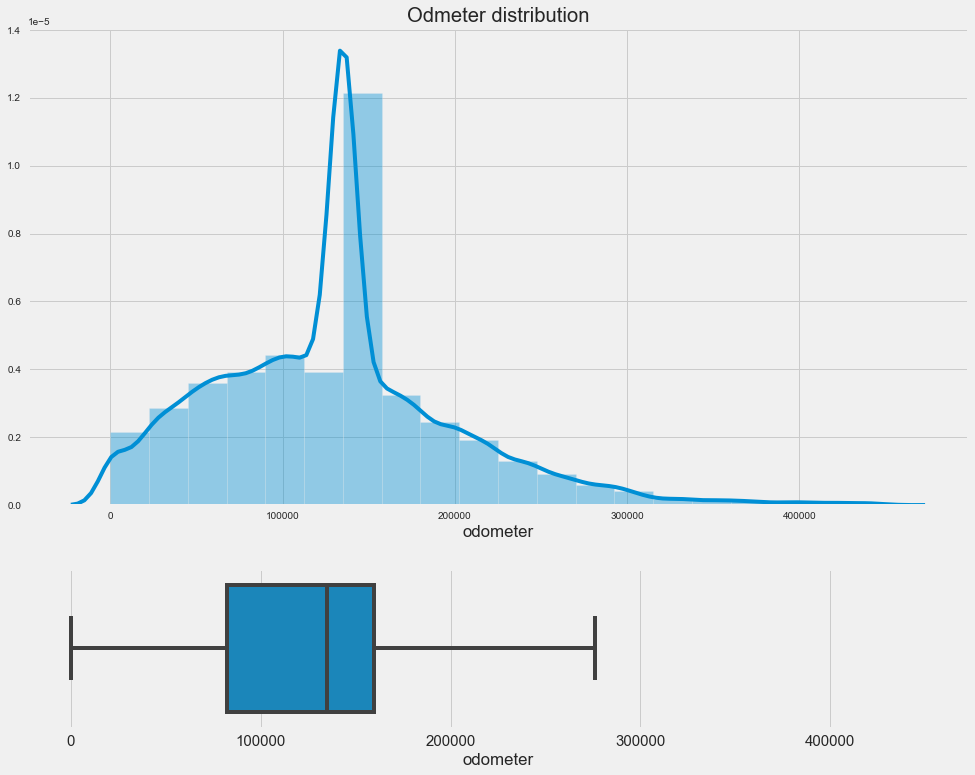

In [333]:
x = df.odometer

f, (ax_hist, ax_box) = plt.subplots(2, gridspec_kw={"height_ratios": (.75, .25)}, figsize=(15,12))
ax_box.tick_params(labelsize=15)
ax_hist.set(title="Odmeter distribution",xlabel = '',);

sns.distplot(x, bins=20, norm_hist=True, ax = ax_hist)
sns.boxplot(x,ax= ax_box,fliersize = 0);


<h3>Encoding categorical features</h3>

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32502 entries, 67 to 435843
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         32502 non-null  int64  
 1   year          32502 non-null  float64
 2   manufacturer  32502 non-null  object 
 3   model         32502 non-null  object 
 4   condition     32502 non-null  object 
 5   cylinders     32502 non-null  object 
 6   odometer      32502 non-null  float64
 7   transmission  32502 non-null  object 
 8   drive         32502 non-null  object 
 9   type          32502 non-null  object 
 10  paint_color   32502 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.2+ MB


In [336]:
categorical_columns= ['manufacturer','model', 'condition','transmission','drive', 'cylinders', 'type' ,'paint_color']
for col in categorical_columns: 
    encoder = LabelEncoder()
    encoder.fit(list(df[col].astype(str).values))
    df[col] = encoder.transform(list(df[col].astype(str).values))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [337]:
df

,price,year,manufacturer,model,condition,cylinders,odometer,transmission,drive,type,paint_color
67,18500,2000.0,2,1661,2,6,252000.0,1,0,10,10
75,19900,2012.0,2,214,2,6,189974.0,0,2,10,10
90,4500,2003.0,29,3188,1,6,189000.0,0,0,8,1
95,9500,2003.0,2,721,0,6,123000.0,0,0,11,10
99,45500,2016.0,2,3407,3,6,51806.0,0,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...
435750,6900,2003.0,2,2159,0,6,79000.0,0,0,10,10
435763,27950,2012.0,2,2147,0,6,115000.0,0,0,10,10
435787,19900,2012.0,29,3809,0,6,131994.0,0,0,10,9
435825,29500,2015.0,20,1133,0,5,90238.0,0,0,10,5


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32502 entries, 67 to 435843
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         32502 non-null  int64  
 1   year          32502 non-null  float64
 2   manufacturer  32502 non-null  int64  
 3   model         32502 non-null  int64  
 4   condition     32502 non-null  int64  
 5   cylinders     32502 non-null  int64  
 6   odometer      32502 non-null  float64
 7   transmission  32502 non-null  int64  
 8   drive         32502 non-null  int64  
 9   type          32502 non-null  int64  
 10  paint_color   32502 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 4.2 MB


<h4>Correlation</h4>

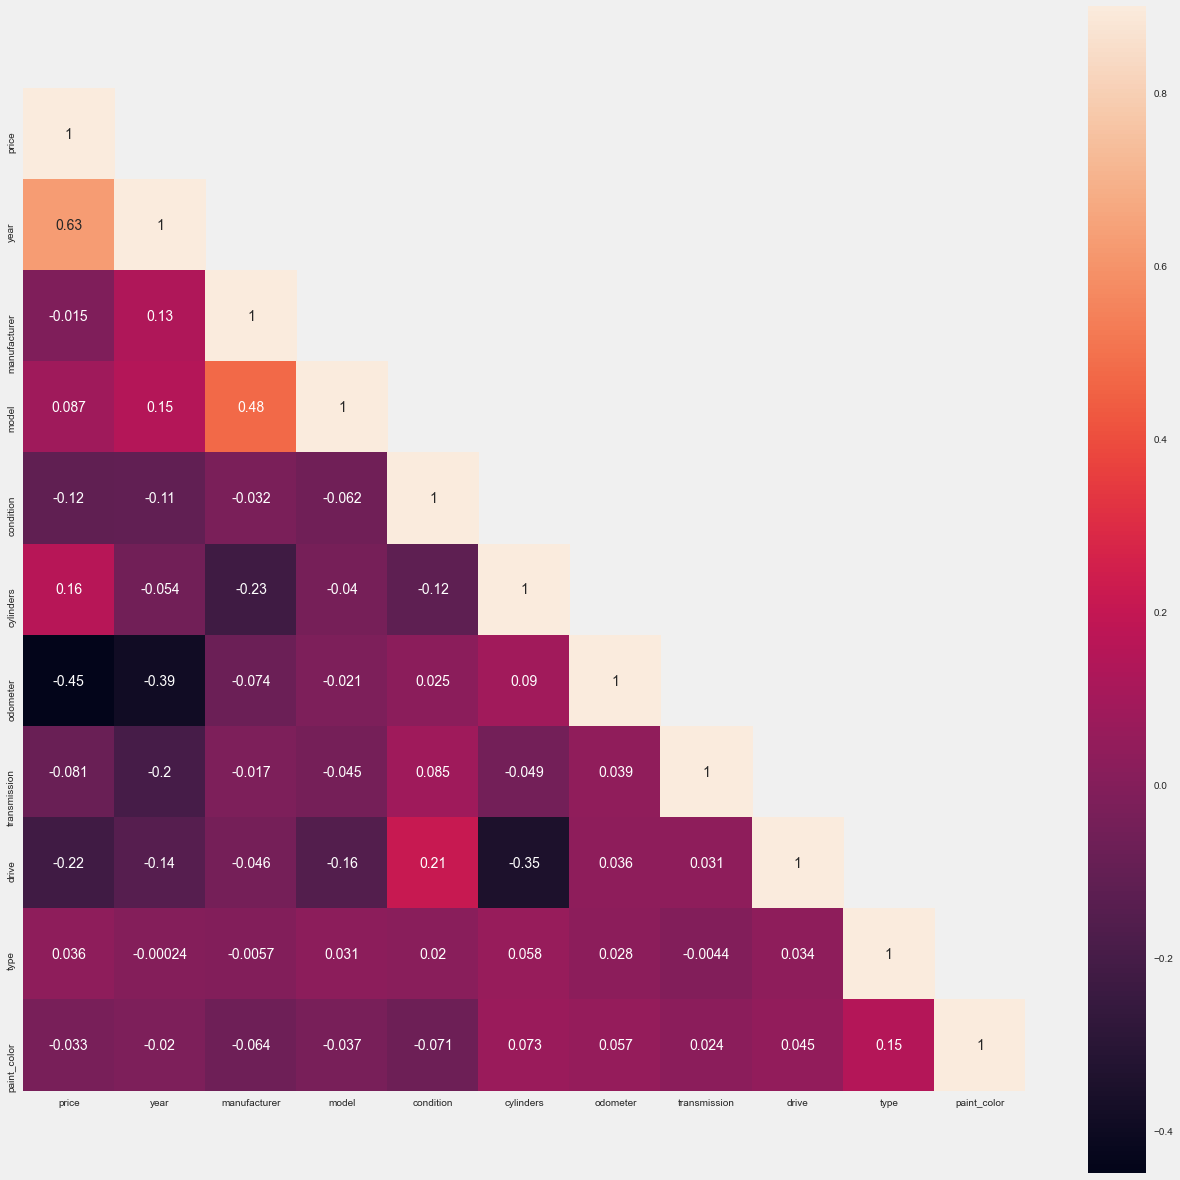

In [339]:
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

<h4> Lets look closer into correleation beetween price, year and odometer </h4>

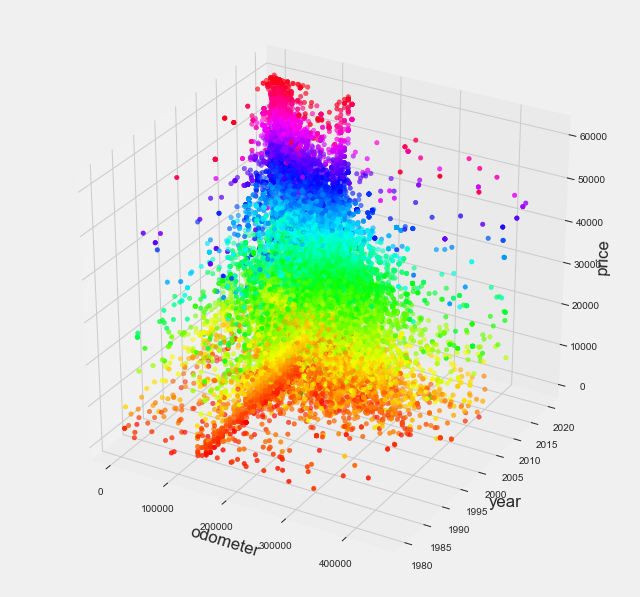

In [352]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

z_points = df['price']
x_points = df['odometer']
y_points = df['year']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

ax.set_xlabel('odometer')
ax.set_ylabel('year')
ax.set_zlabel('price')

plt.show()

<h2> Modelling </h2>

<h3> Scalling data </h3>

In [348]:
# Separating into Y=target and rest=X
X = df.drop('price', axis=1)
Y = df.price

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [349]:
X.head()

,year,manufacturer,model,condition,cylinders,odometer,transmission,drive,type,paint_color
0,-1.497311,-0.895002,-0.688928,1.482117,0.474371,1.777773,2.528704,-0.466531,0.477658,0.589046
1,0.396010,-0.895002,-2.089237,1.482117,0.474371,0.882277,-0.302239,2.398771,0.477658,0.589046
2,-1.023981,1.575765,0.788800,0.456335,0.474371,0.868215,-0.302239,-0.466531,-0.508735,-1.917341
3,-1.023981,-0.895002,-1.598597,-0.569448,0.474371,-0.084655,-0.302239,-0.466531,0.970854,0.589046
4,1.027117,-0.895002,1.000734,2.507899,0.474371,-1.112513,-0.302239,-0.466531,-0.508735,0.032071


In [351]:
Y

67        18500
75        19900
90         4500
95         9500
99        45500
          ...  
435750     6900
435763    27950
435787    19900
435825    29500
435843    46995
Name: price, Length: 32502, dtype: int64

<h3> Splitting data into train and test </h3>

In [357]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

In [358]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [359]:
X_train

,year,manufacturer,model,condition,cylinders,odometer,transmission,drive,type,paint_color
18381,0.396010,-0.895002,1.014282,-0.569448,0.474371,-0.787959,-0.302239,-0.466531,0.477658,-1.638853
24651,-1.339534,-0.895002,-0.290222,1.482117,0.474371,0.088815,2.528704,-0.466531,0.477658,0.589046
19814,0.238233,0.752176,1.471052,1.482117,-0.768315,0.757581,-0.302239,-0.466531,0.477658,0.589046
27971,0.396010,-0.895002,0.020420,-0.569448,0.474371,0.088815,-0.302239,-0.466531,0.477658,0.589046
7224,0.238233,0.752176,-0.111191,-0.569448,0.474371,0.088815,-0.302239,-0.466531,0.477658,0.589046
...,...,...,...,...,...,...,...,...,...,...
5695,-0.077320,0.752176,1.677179,-0.569448,-0.768315,-0.100536,-0.302239,2.398771,0.477658,0.589046
8006,-0.708427,-0.803492,-1.414727,1.482117,-0.768315,-1.208622,-0.302239,2.398771,0.477658,0.589046
17745,1.184893,-0.895002,-0.510865,1.482117,0.474371,-1.475931,-0.302239,-0.466531,-0.508735,0.589046
17931,0.238233,0.752176,1.291054,-0.569448,-0.768315,-0.048186,-0.302239,-0.466531,-0.508735,0.589046


In [364]:
X_test

,year,manufacturer,model,condition,cylinders,odometer,transmission,drive,type,paint_color
24438,-0.708427,1.575765,-1.418598,0.456335,0.474371,0.088815,-0.302239,2.398771,0.477658,0.867533
16752,0.238233,1.575765,0.734607,-0.569448,0.474371,0.795624,-0.302239,-0.466531,-1.001931,0.589046
24963,-0.550651,-0.803492,-1.397308,-0.569448,0.474371,0.088815,-0.302239,-0.466531,0.477658,0.589046
30765,-1.655088,-0.895002,-0.457640,1.482117,0.474371,1.691321,-0.302239,-0.466531,0.477658,-2.195828
5515,-1.181757,-0.895002,-0.101514,-0.569448,0.474371,-1.513960,-0.302239,-0.466531,0.477658,0.589046
...,...,...,...,...,...,...,...,...,...,...
27887,-1.181757,1.484255,0.552674,-0.569448,0.474371,0.088815,-0.302239,-0.466531,-0.015539,0.032071
15316,0.396010,0.752176,1.290086,-0.569448,0.474371,0.480166,-0.302239,-0.466531,0.477658,0.589046
1865,-3.548408,-0.895002,-1.916013,1.482117,0.474371,-1.427335,-0.302239,-0.466531,-1.001931,0.589046
15664,0.711563,-0.895002,-2.036980,1.482117,0.474371,-0.156842,2.528704,-0.466531,0.477658,0.589046


In [361]:
Y_train

252026    28000
334305    11000
272089    21495
377859    59000
100775    24995
          ...  
79079     32988
112935     4900
244052    42990
246365    30795
179591    10900
Name: price, Length: 22751, dtype: int64

In [362]:
Y_test

332196    12000
230070    14999
337914    37950
413047     6000
75761     40000
          ...  
376538     2350
209022    27999
26652     45995
214502    13950
298502    25750
Name: price, Length: 9751, dtype: int64

In [365]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22751 entries, 18381 to 13151
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          22751 non-null  float64
 1   manufacturer  22751 non-null  float64
 2   model         22751 non-null  float64
 3   condition     22751 non-null  float64
 4   cylinders     22751 non-null  float64
 5   odometer      22751 non-null  float64
 6   transmission  22751 non-null  float64
 7   drive         22751 non-null  float64
 8   type          22751 non-null  float64
 9   paint_color   22751 non-null  float64
dtypes: float64(10)
memory usage: 1.9 MB


In [366]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9751 entries, 24438 to 21785
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          9751 non-null   float64
 1   manufacturer  9751 non-null   float64
 2   model         9751 non-null   float64
 3   condition     9751 non-null   float64
 4   cylinders     9751 non-null   float64
 5   odometer      9751 non-null   float64
 6   transmission  9751 non-null   float64
 7   drive         9751 non-null   float64
 8   type          9751 non-null   float64
 9   paint_color   9751 non-null   float64
dtypes: float64(10)
memory usage: 838.0 KB


<h3> Defining some functions for R-Squared and RMSE result </h3>

In [367]:
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

In [368]:
def acc_rmse(y_meas, y_pred):
    return (mean_squared_error(y_meas, y_pred))**0.5

In [384]:
def acc_model(num,model,train,test):
  
    global r2_train, r2_test, rmse_train, rmse_test
    
    Y_train_res = model.predict(train)  
    Y_test_res = model.predict(test)

    r2_train_res = round(r2_score(Y_train, Y_train_res) * 100, 2)
    print('acc(r2_score) for train =', r2_train_res)   
    r2_train.insert(num, r2_train_res)
    
    r2_test_res = round(r2_score(Y_test, Y_test_res) * 100, 2)
    print('acc(r2_score) for test =',  r2_test_res)
    r2_test.insert(num,  r2_test_res)

    rmse_train_res = round(acc_rmse(Y_train, Y_train_res) * 100, 2)
    print('acc(rmse) for train =', rmse_train_res)   
    rmse_train.insert(num, rmse_train_res)
    

    rmse_test_res = round(acc_rmse(Y_test, Y_test_res) * 100, 2)
    print('acc(rmse) for test =', rmse_test_res)
    rmse_test.insert(num, rmse_test_res)

<h2> Linear Regression </h2>

In [385]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
acc_model(0,linreg, X_train, X_test)

acc(r2_score) for train = 50.28
acc(r2_score) for test = 50.77
acc(rmse) for train = 907803.86
acc(rmse) for test = 900352.99
